Enter the number of clusters (K):  3


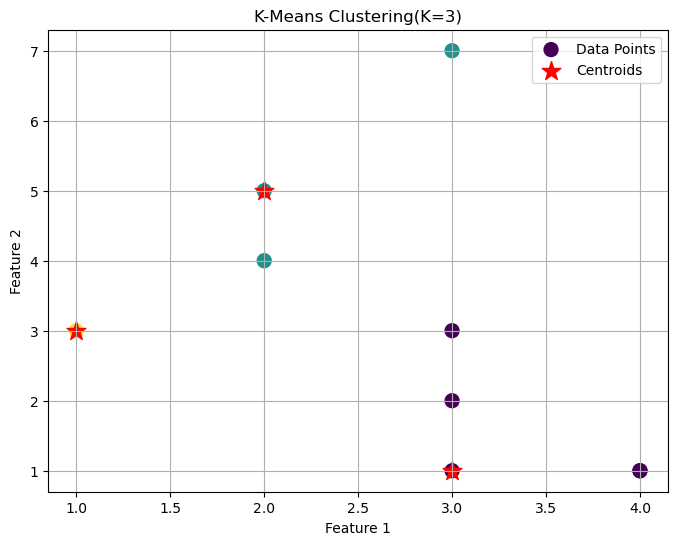

In [23]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[3, 1], [3, 7], [2, 4], [1, 3], [3, 2], [4, 1],[2,5],[4,1],[3,3]])

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

#K-Means Algorithm
def kmeans(X, K, max_iters=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    
    clusters = np.zeros(X.shape[0])
    
    for i in range(max_iters):
        for idx, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            clusters[idx] = np.argmin(distances)
        
        # Calculate new centroids
        new_centroids = np.zeros_like(centroids)
        for k in range(K):
            points_in_cluster = X[clusters == k]
            if len(points_in_cluster) > 0:
                new_centroids[k] = np.mean(points_in_cluster, axis=0)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, clusters

K = int(input("Enter the number of clusters (K): "))

centroids, clusters = kmeans(X, K)

plt.figure(figsize=(8, 6))

# Plot the data points and color
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', s=100, label="Data Points")

# Plot the centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroids')
plt.title(f"K-Means Clustering(K={K})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
